In [1]:
from datasets import load_dataset

ds = load_dataset("microsoft/ms_marco", "v1.1")

In [2]:
print(type(ds))

<class 'datasets.dataset_dict.DatasetDict'>


In [3]:
import pandas as pd 

query_df = pd.DataFrame(ds['train']['query'])
query_df.head()

,0
0,what is rba
1,was ronald reagan a democrat
2,how long do you need for sydney and surroundin...
3,price to install tile in shower
4,why conversion observed in body


In [4]:
print(len(query_df))
print(type(query_df))
query_df.columns = ['query']

82326
<class 'pandas.core.frame.DataFrame'>


In [5]:
num_nans = query_df['query'].isna().sum()
print(num_nans)

0


In [6]:
query_df['query_length'] = query_df['query'].apply(len)
avg_q_lenght = query_df['query_length'].mean()
print(avg_q_lenght)


33.9625756140223


<Axes: >

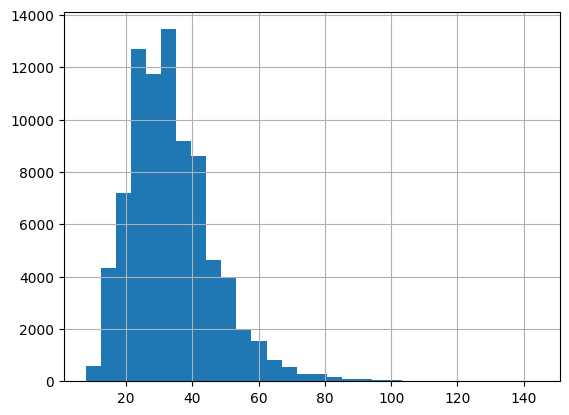

In [7]:
import matplotlib.pyplot as plt

query_df['query_length'].hist(bins=30)

In [8]:
query_df['query_w_length'] = query_df['query'].apply(lambda x: len(x.split()))
avg_q_w_lenght = query_df['query_w_length'].mean()
print(avg_q_w_lenght)

6.04838082744212


<Axes: >

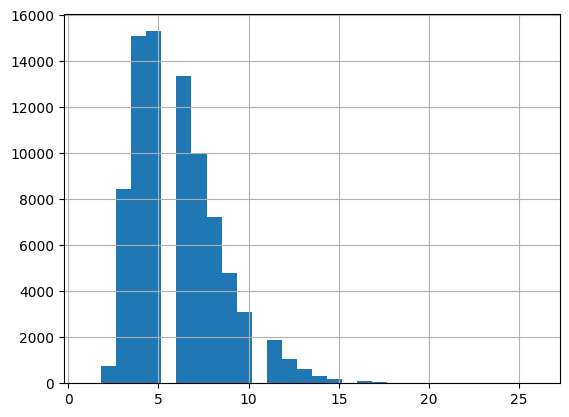

In [9]:
query_df['query_w_length'].hist(bins=30)

In [10]:
ds_df = pd.DataFrame(ds['train'])
ds_df.head()

,answers,passages,query,query_id,query_type,wellFormedAnswers
0,[Results-Based Accountability is a disciplined...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",what is rba,19699,description,[]
1,[Yes],"{'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...",was ronald reagan a democrat,19700,description,[]
2,[20-25 minutes],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",how long do you need for sydney and surroundin...,19701,numeric,[]
3,[$11 to $22 per square foot],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...",price to install tile in shower,19702,numeric,[]
4,[Due to symptoms in the body],"{'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...",why conversion observed in body,19703,description,[]


In [11]:
ds_df['passages']

0        {'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...
1        {'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...
2        {'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...
3        {'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...
4        {'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...
                               ...                        
82321    {'is_selected': [1, 0, 0], 'passage_text': ['d...
82322    {'is_selected': [0, 0, 1, 0, 0, 0, 0, 0, 0], '...
82323    {'is_selected': [0, 1, 0, 0, 0, 0], 'passage_t...
82324    {'is_selected': [0, 0, 0, 1, 0, 0, 0, 0, 0], '...
82325    {'is_selected': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]...
Name: passages, Length: 82326, dtype: object

In [12]:
passages_df = ds_df["passages"].apply(pd.Series)
print(type(passages_df))
print(passages_df.head())

<class 'pandas.core.frame.DataFrame'>
                      is_selected  \
0  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]   
1           [0, 1, 0, 0, 0, 0, 0]   
2  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]   
3     [0, 0, 0, 0, 0, 0, 0, 0, 1]   
4        [0, 0, 1, 0, 0, 0, 0, 0]   

                                        passage_text  \
0  [Since 2007, the RBA's outstanding reputation ...   
1  [In his younger years, Ronald Reagan was a mem...   
2  [Sydney, New South Wales, Australia is located...   
3  [In regards to tile installation costs, consum...   
4  [Conclusions: In adult body CT, dose to an org...   

                                                 url  
0  [https://en.wikipedia.org/wiki/Reserve_Bank_of...  
1  [http://www.history.com/topics/us-presidents/r...  
2  [https://en.wikipedia.org/wiki/Geography_of_Sy...  
3  [http://www.improvenet.com/r/costs-and-prices/...  
4  [http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...  


In [13]:
passages_df.head()

,is_selected,passage_text,url
0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[Since 2007, the RBA's outstanding reputation ...",[https://en.wikipedia.org/wiki/Reserve_Bank_of...
1,"[0, 1, 0, 0, 0, 0, 0]","[In his younger years, Ronald Reagan was a mem...",[http://www.history.com/topics/us-presidents/r...
2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[Sydney, New South Wales, Australia is located...",[https://en.wikipedia.org/wiki/Geography_of_Sy...
3,"[0, 0, 0, 0, 0, 0, 0, 0, 1]","[In regards to tile installation costs, consum...",[http://www.improvenet.com/r/costs-and-prices/...
4,"[0, 0, 1, 0, 0, 0, 0, 0]","[Conclusions: In adult body CT, dose to an org...",[http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...


In [14]:
df_unrolled = pd.concat([ds_df.drop(columns=["passages"]), passages_df], axis=1)
df_unrolled.head()

,answers,query,query_id,query_type,wellFormedAnswers,is_selected,passage_text,url
0,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[Since 2007, the RBA's outstanding reputation ...",[https://en.wikipedia.org/wiki/Reserve_Bank_of...
1,[Yes],was ronald reagan a democrat,19700,description,[],"[0, 1, 0, 0, 0, 0, 0]","[In his younger years, Ronald Reagan was a mem...",[http://www.history.com/topics/us-presidents/r...
2,[20-25 minutes],how long do you need for sydney and surroundin...,19701,numeric,[],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[Sydney, New South Wales, Australia is located...",[https://en.wikipedia.org/wiki/Geography_of_Sy...
3,[$11 to $22 per square foot],price to install tile in shower,19702,numeric,[],"[0, 0, 0, 0, 0, 0, 0, 0, 1]","[In regards to tile installation costs, consum...",[http://www.improvenet.com/r/costs-and-prices/...
4,[Due to symptoms in the body],why conversion observed in body,19703,description,[],"[0, 0, 1, 0, 0, 0, 0, 0]","[Conclusions: In adult body CT, dose to an org...",[http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...


In [15]:
# Step 3: Explode both columns to create separate rows
df_exploded = df_unrolled.explode(["is_selected", "passage_text"], ignore_index=True)

# Display the final transformed DataFrame
df_exploded.head()

,answers,query,query_id,query_type,wellFormedAnswers,is_selected,passage_text,url
0,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],0,"Since 2007, the RBA's outstanding reputation h...",[https://en.wikipedia.org/wiki/Reserve_Bank_of...
1,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],0,The Reserve Bank of Australia (RBA) came into ...,[https://en.wikipedia.org/wiki/Reserve_Bank_of...
2,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],0,RBA Recognized with the 2014 Microsoft US Regi...,[https://en.wikipedia.org/wiki/Reserve_Bank_of...
3,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],0,The inner workings of a rebuildable atomizer a...,[https://en.wikipedia.org/wiki/Reserve_Bank_of...
4,[Results-Based Accountability is a disciplined...,what is rba,19699,description,[],0,Results-Based Accountability® (also known as R...,[https://en.wikipedia.org/wiki/Reserve_Bank_of...


In [28]:
print(df_exploded.columns)

Index(['answers', 'query', 'query_id', 'query_type', 'wellFormedAnswers',
       'is_selected', 'passage_text', 'url'],
      dtype='object')


In [16]:
# Select the 'passage_text' column and create a new DataFrame
passage_txt_df = df_exploded[['passage_text']].copy()

# Calculate the word length of each passage
passage_txt_df['passage_w_length'] = passage_txt_df['passage_text'].apply(lambda x: len(x.split()))

# Compute the average word length
avg_passage_w_length = passage_txt_df['passage_w_length'].mean()

# Print the average word length
print(avg_passage_w_length)

70.88771992611576


<Axes: >

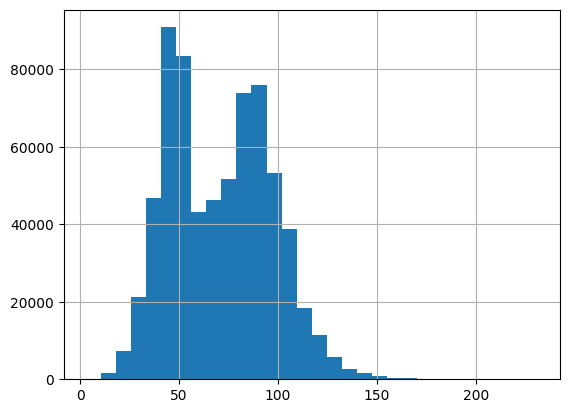

In [17]:
passage_txt_df['passage_w_length'].hist(bins=30)

In [ ]:
# Select the 'passage_text' column and create a new DataFrame
is_selected_df = df_unrolled[['is_selected']].copy()

# Calculate the word length of each passage
is_selected_df['sel_length'] = is_selected_df['is_selected'].apply(len)

# Compute the average passage length
sel_mean = is_selected_df['sel_length'].mean()

# Print the average word length
print(sel_mean)

8.21360202123266


<Axes: >

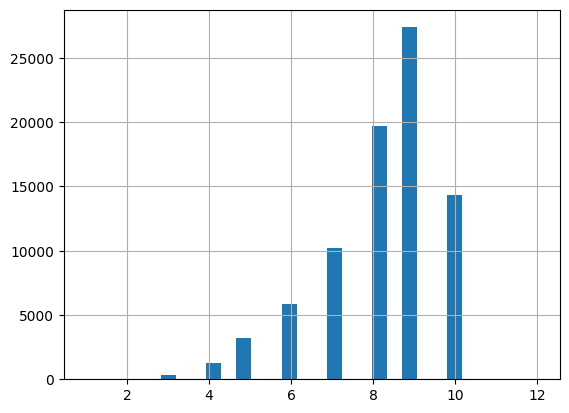

In [27]:
is_selected_df['sel_length'].hist(bins=30)